# ===============================================================

# CREDIT CARD FRAUD DETECTION

# ===============================================================

# 

## importing the libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## reading the dataset

In [ ]:
df = pd.read_csv("/content/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## getting the dataset info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## data preprocessing

### checking for null values

In [ ]:
df.isnull().sum()  # there are no none values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### dataset summary

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## checking the correlation between different attributes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

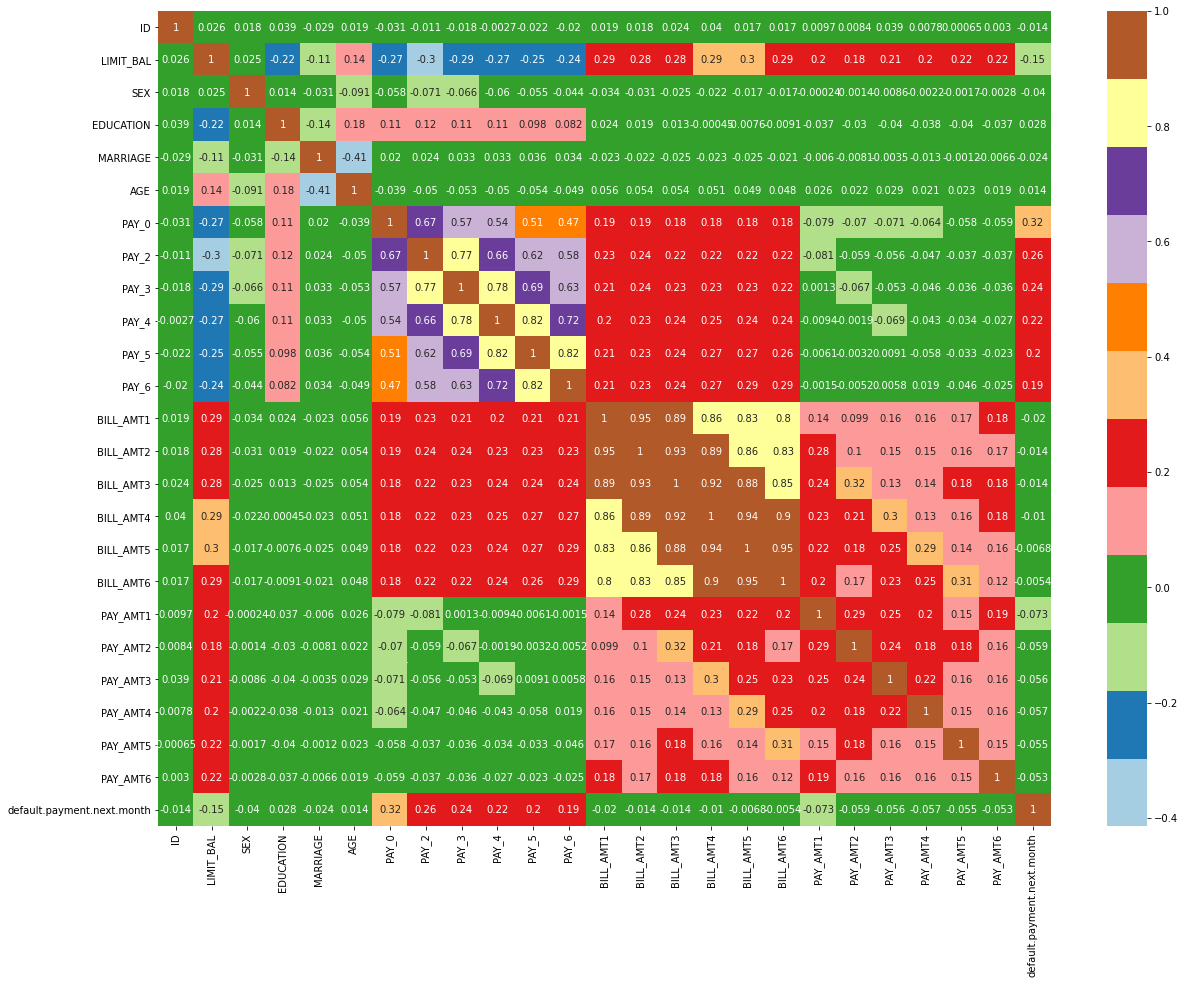

In [ ]:
plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='Paired')

## creating train and test dataset

In [ ]:
X = df.drop(["ID", "default.payment.next.month"], axis=1)
y = df['default.payment.next.month']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## RandomForestClassifier

### Train the model

In [ ]:
rf_class = RandomForestClassifier()
rf_model = rf_class.fit(X_train, y_train)  # fit model

### Model prediction

In [ ]:
y_pred_rf = rf_model.predict(X_test)  # predict testing
y_pred_rf_train = rf_model.predict(X_train)  # predict training

### Model Evaluation

#### importing classification report and confusion matrix from sklearn

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Default Model

#### classification_report

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4685
           1       0.65      0.36      0.46      1315

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



#### confusion matrix

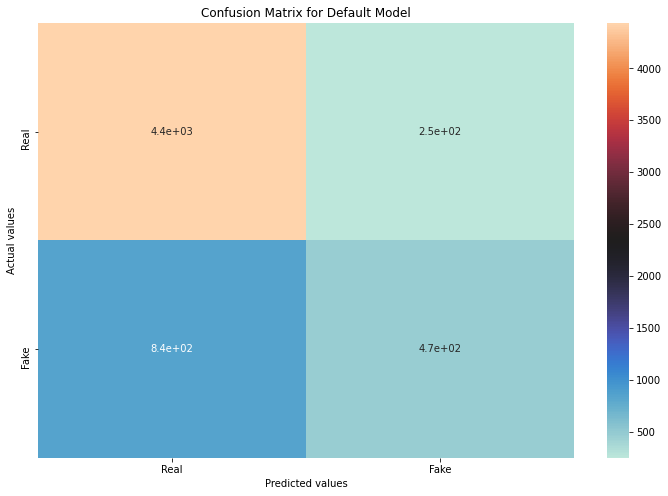

In [ ]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Default Model')
plt.show()

#### accuracy score

In [ ]:
print("training accuracy:", accuracy_score(y_train, y_pred_rf_train)*100, "%")
print("testing accuracy:", accuracy_score(y_test, y_pred_rf)*100, "%")

training accuracy: 99.94166666666666 %
testing accuracy: 81.78333333333333 %


## Boosting the model

### Train the model

In [ ]:
rf_class_boost = RandomForestClassifier(n_estimators=900, max_features=5)
rf_model_boost = rf_class_boost.fit(X_train, y_train)  # fit model

### Model prediction

In [ ]:
y_pred_rf = rf_model_boost.predict(X_test)  # predict testing
y_pred_rf_train = rf_model_boost.predict(X_train)  # predict training

### Model Evaluation

#### importing classification report and confusion matrix from sklearn

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Default Model

#### classification_report

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4685
           1       0.66      0.36      0.47      1315

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



#### confusion matrix

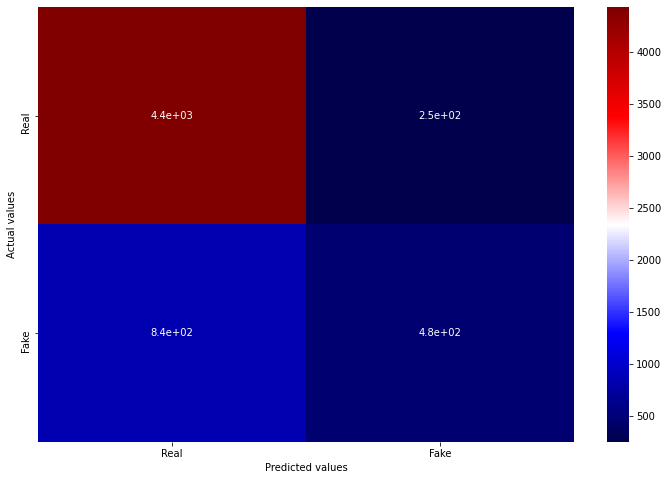

In [ ]:
#visuvalizing confusion plasma
mat = confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="seismic", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

#### accuracy score

In [ ]:
print("training accuracy:", accuracy_score(y_train, y_pred_rf_train)*100, "%")
print("testing accuracy:", accuracy_score(y_test, y_pred_rf)*100, "%")

training accuracy: 99.95 %
testing accuracy: 81.88333333333333 %


## Grid Search

### import the libary

In [ ]:
from sklearn.model_selection import GridSearchCV

### using the default parameters

In [ ]:
rf_parameters = {'n_estimators': [900]}
grid = GridSearchCV(rf_model,param_grid=rf_parameters)
grid_model = grid.fit(X_train,y_train)

In [ ]:
grid_model.best_params_

{'n_estimators': 900}

### Model prediction

In [ ]:
predictionforest_test = grid_model.predict(X_test)
predictionforest_train = grid_model.predict(X_train)

### confusion matrix

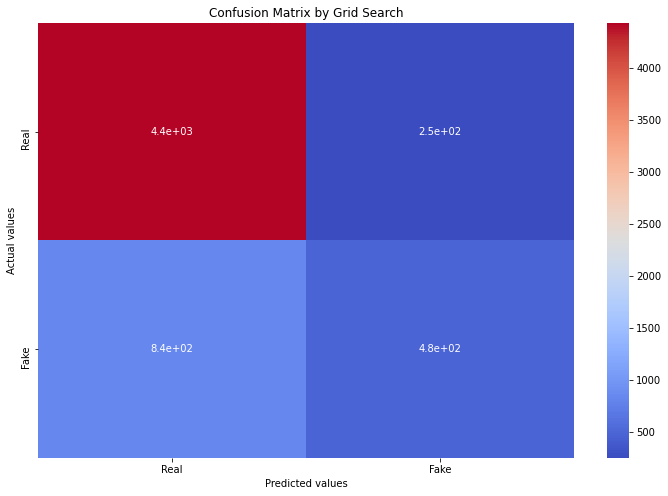

In [ ]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test,predictionforest_test)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="coolwarm", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix by Grid Search')
plt.show()

### classification report

In [ ]:
print(classification_report(y_test, predictionforest_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4685
           1       0.66      0.36      0.47      1315

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



### model accuracy

In [ ]:
print("training accuracy:", accuracy_score(y_train, predictionforest_train)*100, "%")
print("testing accuracy:", accuracy_score(y_test, predictionforest_test)*100, "%")

training accuracy: 99.95 %
testing accuracy: 81.91666666666667 %


# 

# ===============================================================

# THE END

# ===============================================================